# WRF-Ensembly Tutorial

This notebook contains the code to make some plots related to the WRF-Ensembly tutorial.

In [ ]:
from pathlib import Path

import ipywidgets

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

exp_root = Path("~/data/wrf_experiments/tutorial").expanduser()

## Initial Conditions 

Comparison before/after perturbations

In [ ]:
# cams_fc = (
#     xr.open_dataset(
#         Path(
#             "~/data/Modelling/ensembly_tutorial/CAMS_FC/2025-04-05_00/data_mlev.nc"
#         ).expanduser(),z
#         decode_timedelta=True,
#     )
#     .stack(time=["forecast_reference_time", "forecast_period"])
#     .drop_vars("time")
#     .set_index(time="valid_time")
# )
# cams_fc

In [2]:
wrf_input_orig = xr.open_dataset(
    exp_root / "data/initial_boundary/wrfinput_d01_cycle_0"
).isel(Time=0)
wrf_input_orig

<xarray.Dataset> Size: 267MB
Dimensions:               (south_north: 129, west_east: 229,
                           months_per_year_stag: 12, bottom_top: 44,
                           dust_erosion_dimension: 3, bottom_top_stag: 45,
                           soil_layers_stag: 4, west_east_stag: 230,
                           south_north_stag: 130, DIM0011: 5,
                           land_cat_stag: 21, soil_cat_stag: 16,
                           num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (south_north, west_east) float32 118kB ...
    XLONG                 (south_north, west_east) float32 118kB ...
    XLAT_U                (south_north, west_east_stag) float32 119kB ...
    XLONG_U               (south_north, west_east_stag) float32 119kB ...
    XLAT_V                (south_north_stag, west_east) float32 119kB ...
    XLONG_V               (south_north_stag, west_east) float32 119kB ...
Dimensions without coordinates: south_north, west_east, months_per_year_stag,
                                bottom_top, dust_erosion_dimension,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, DIM0011,
                                land_cat_stag, soil_cat_stag,
                                num_ext_model_couple_dom_stag
Data variables: (12/244)
    Times                 |S19 19B ...
    UST_T                 (south_north, west_east) float32 118kB ...
    DUST_EMIS_WEIGHT      (south_north, west_east) float32 118kB ...
    SEBIO_ISO             (south_north, west_east) float32 118kB ...
    SEBIO_OLI             (south_north, west_east) float32 118kB ...
    SEBIO_API             (south_north, west_east) float32 118kB ...
    ...                    ...
    C4F                   (bottom_top_stag) float32 180B ...
    PCB                   (south_north, west_east) float32 118kB ...
    PC                    (south_north, west_east) float32 118kB ...
    LANDMASK              (south_north, west_east) float32 118kB ...
    LAKEMASK              (south_north, west_east) float32 118kB ...
    SST                   (south_north, west_east) float32 118kB ...
Attributes: (12/92)
    TITLE:                            OUTPUT FROM REAL_EM V4.7.0 PREPROCESSOR
    START_DATE:                      2025-04-05_00:00:00
    SIMULATION_START_DATE:           2025-04-05_00:00:00
    WEST-EAST_GRID_DIMENSION:        230
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [3]:
wrf_input_pert = xr.open_dataset(
    exp_root / "work/ensemble/member_00/wrfinput_d01"
).isel(Time=0)
wrf_input_pert

<xarray.Dataset> Size: 267MB
Dimensions:               (south_north: 129, west_east: 229,
                           months_per_year_stag: 12, bottom_top: 44,
                           dust_erosion_dimension: 3, bottom_top_stag: 45,
                           soil_layers_stag: 4, west_east_stag: 230,
                           south_north_stag: 130, DIM0011: 5,
                           land_cat_stag: 21, soil_cat_stag: 16,
                           num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (south_north, west_east) float32 118kB ...
    XLONG                 (south_north, west_east) float32 118kB ...
    XLAT_U                (south_north, west_east_stag) float32 119kB ...
    XLONG_U               (south_north, west_east_stag) float32 119kB ...
    XLAT_V                (south_north_stag, west_east) float32 119kB ...
    XLONG_V               (south_north_stag, west_east) float32 119kB ...
Dimensions without coordinates: south_north, west_east, months_per_year_stag,
                                bottom_top, dust_erosion_dimension,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, DIM0011,
                                land_cat_stag, soil_cat_stag,
                                num_ext_model_couple_dom_stag
Data variables: (12/244)
    Times                 |S19 19B ...
    UST_T                 (south_north, west_east) float32 118kB ...
    DUST_EMIS_WEIGHT      (south_north, west_east) float32 118kB ...
    SEBIO_ISO             (south_north, west_east) float32 118kB ...
    SEBIO_OLI             (south_north, west_east) float32 118kB ...
    SEBIO_API             (south_north, west_east) float32 118kB ...
    ...                    ...
    C4F                   (bottom_top_stag) float32 180B ...
    PCB                   (south_north, west_east) float32 118kB ...
    PC                    (south_north, west_east) float32 118kB ...
    LANDMASK              (south_north, west_east) float32 118kB ...
    LAKEMASK              (south_north, west_east) float32 118kB ...
    SST                   (south_north, west_east) float32 118kB ...
Attributes: (12/92)
    TITLE:                            OUTPUT FROM REAL_EM V4.7.0 PREPROCESSOR
    START_DATE:                      2025-04-05_00:00:00
    SIMULATION_START_DATE:           2025-04-05_00:00:00
    WEST-EAST_GRID_DIMENSION:        230
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

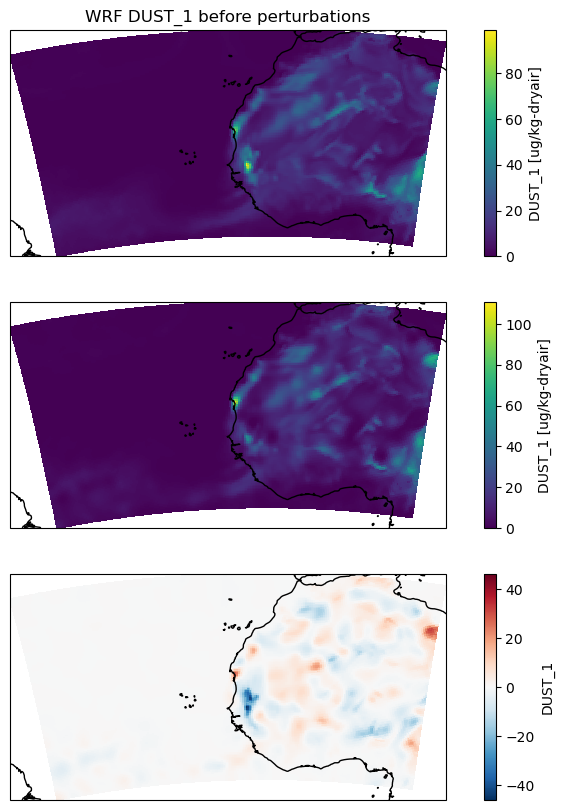

In [ ]:
fig, axes = plt.subplots(
    3,
    1,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
    subplot_kw={"projection": ccrs.PlateCarree()},
)

wrf_input_orig.DUST_1.isel(bottom_top=2).plot(x="XLONG", y="XLAT", vmin=0, ax=axes[0])
axes[0].set_title("WRF DUST_1 before perturbations")

wrf_input_pert.DUST_1.isel(bottom_top=2).plot(x="XLONG", y="XLAT", vmin=0, ax=axes[1])
axes[0].set_title("WRF DUST_1 before perturbations")

(
    wrf_input_pert.DUST_1.isel(bottom_top=2) - wrf_input_orig.DUST_1.isel(bottom_top=2)
).plot(x="XLONG", y="XLAT", ax=axes[2])

# cams_fc.sel(time="2025-04-05T03:00:00").aermr01.sum(dim="model_level").plot(
#     x="longitude", y="latitude", ax=axes[1]
# )
# axes[1].set_title("CAMS AERMOD DUST before perturbations")

axes[0].set_extent(
    [
        wrf_input_orig.XLONG.min(),
        wrf_input_orig.XLONG.max(),
        wrf_input_orig.XLAT.min(),
        wrf_input_orig.XLAT.max(),
    ],
    crs=ccrs.PlateCarree(),
)

for ax in axes:
    ax.coastlines()

## Assimilation Diagnostics

In [2]:
diag = pd.read_parquet(
    "/home/thgeorgiou/data/wrf_experiments/tutorial_test/data/diagnostics/cycle_0.parquet"
)
diag

,obs,obs_variance,prior_mean,prior_spread,posterior_mean,posterior_spread,x,y,z,timestamp,obs_type,dart_qc
0,5.767039e-04,3.009010e-07,0.000084,2.505098e-05,0.000054,1.292762e-05,339.637564,3.394275,1694.915254,2025-04-05 03:17:23,LIDAR_EXTINCTION,0.0
1,1.116176e-04,1.162733e-08,0.000123,3.599380e-05,0.000076,1.876900e-05,339.637564,3.394275,2033.898305,2025-04-05 03:17:23,LIDAR_EXTINCTION,0.0
2,6.222600e-05,4.691429e-09,0.000114,3.449896e-05,0.000057,1.793418e-05,339.637564,3.394275,2372.881356,2025-04-05 03:17:23,LIDAR_EXTINCTION,0.0
3,6.335702e-05,4.195300e-09,0.000130,4.333806e-05,0.000049,2.317422e-05,339.637564,3.394275,2711.864407,2025-04-05 03:17:23,LIDAR_EXTINCTION,0.0
4,5.303992e-05,5.012855e-09,0.000139,4.457921e-05,0.000045,2.447798e-05,339.637564,3.394275,3050.847458,2025-04-05 03:17:23,LIDAR_EXTINCTION,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,2.379131e-05,1.634078e-09,0.000024,4.648259e-06,0.000016,4.043253e-06,332.994584,35.450201,7796.610169,2025-04-05 03:25:39,LIDAR_EXTINCTION,0.0
1555,2.592675e-05,1.421332e-09,0.000023,3.810240e-06,0.000016,3.194689e-06,332.994584,35.450201,8135.593220,2025-04-05 03:25:39,LIDAR_EXTINCTION,0.0
1556,2.644642e-05,1.418474e-09,0.000023,2.960051e-06,0.000017,2.354472e-06,332.994584,35.450201,8474.576271,2025-04-05 03:25:39,LIDAR_EXTINCTION,0.0
1557,2.442990e-06,3.821607e-11,0.000010,6.403369e-08,0.000010,4.505543e-08,332.994584,35.450201,10169.491525,2025-04-05 03:25:39,LIDAR_EXTINCTION,0.0


(-4.385724129606136e-05, 0.0008695602306377575)

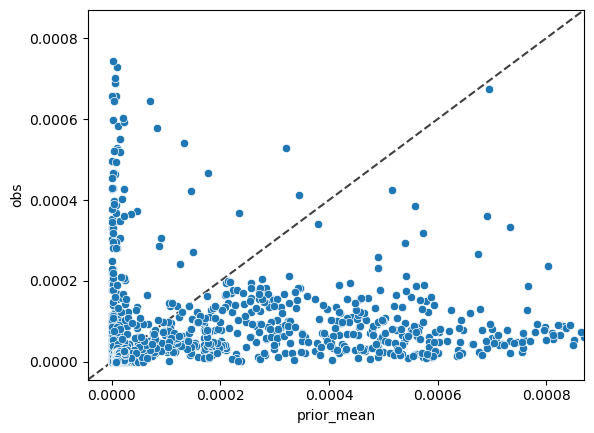

In [ ]:
sns.scatterplot(data=diag, x="prior_mean", y="obs")
# Add a 45-degree line
lims = [
    np.min([diag["prior_mean"].min(), diag["posterior_mean"].min()]),
    np.max([diag["prior_mean"].max(), diag["posterior_mean"].max()]),
]
plt.plot(lims, lims, "k--", alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)

(-4.385724129606136e-05, 0.0008695602306377575)

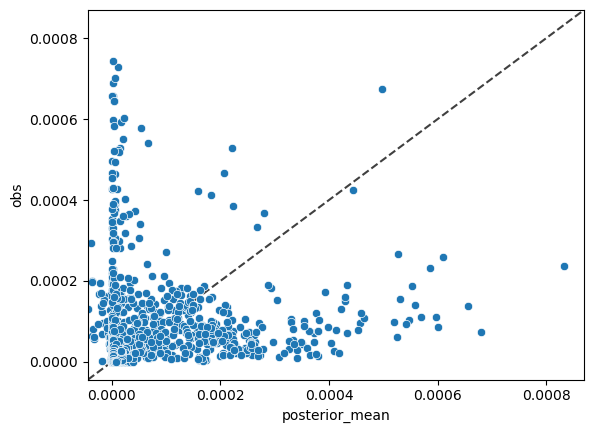

In [4]:
sns.scatterplot(data=diag, x="posterior_mean", y="obs")
lims = [
    np.min([diag["prior_mean"].min(), diag["posterior_mean"].min()]),
    np.max([diag["prior_mean"].max(), diag["posterior_mean"].max()]),
]
plt.plot(lims, lims, "k--", alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)

(1.617203443024741e-14, 7.981489475195531e-05)

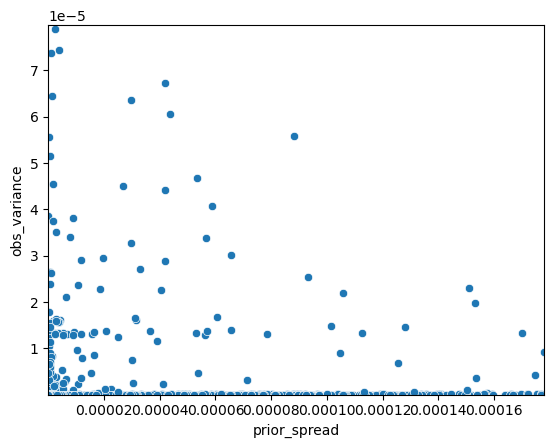

In [9]:
x_lower, x_upper = diag["prior_spread"].quantile([0.01, 0.99])
y_lower, y_upper = diag["obs_variance"].quantile([0.01, 0.99])

sns.scatterplot(data=diag, x="prior_spread", y="obs_variance")
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)

(-4.385724129606136e-05, 0.0008695602306377575)

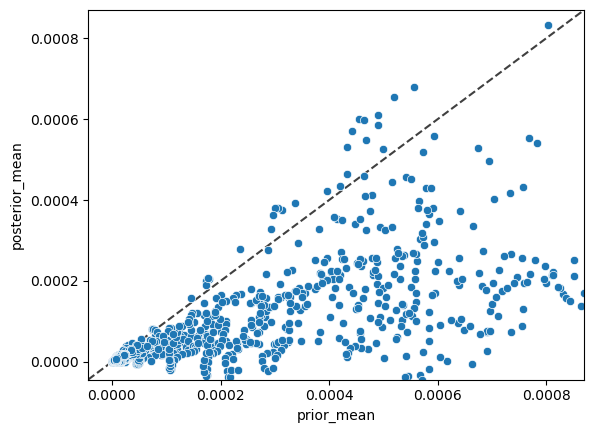

In [ ]:
sns.scatterplot(
    data=diag,
    x="prior_mean",
    y="posterior_mean",
)

# Add a 45-degree line
lims = [
    np.min([diag["prior_mean"].min(), diag["posterior_mean"].min()]),
    np.max([diag["prior_mean"].max(), diag["posterior_mean"].max()]),
]
plt.plot(lims, lims, "k--", alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)

## Forecast vs Analysis

In [5]:
fc = xr.open_dataset(exp_root / "data/forecasts/cycle_000/forecast_mean_cycle_000.nc")
fc_sd = xr.open_dataset(exp_root / "data/forecasts/cycle_000/forecast_sd_cycle_000.nc")
fc

<xarray.Dataset> Size: 2GB
Dimensions:              (t: 3, y: 129, x: 229, klevs_for_dust: 1, z: 44,
                          soil_layers: 3)
Coordinates:
    latitude             (y, x) float32 118kB ...
    longitude            (y, x) float32 118kB ...
  * z                    (z) float32 176B 0.9969 0.9904 ... 0.01402 0.004424
  * x                    (x) float64 2kB -4.047e+06 -4.017e+06 ... 2.793e+06
  * y                    (y) float64 1kB -1.909e+06 -1.879e+06 ... 1.931e+06
Dimensions without coordinates: t, klevs_for_dust, soil_layers
Data variables: (12/122)
    UST_T                (t, y, x) float32 354kB ...
    quantization_info    |S1 1B ...
    EDUST1               (t, klevs_for_dust, y, x) float32 354kB ...
    EDUST2               (t, klevs_for_dust, y, x) float32 354kB ...
    EDUST3               (t, klevs_for_dust, y, x) float32 354kB ...
    EDUST4               (t, klevs_for_dust, y, x) float32 354kB ...
    ...                   ...
    AOD_DUST_550         (t, y, x) float64 709kB ...
    AOD_SEAS_550         (t, y, x) float64 709kB ...
    AOD_550              (t, y, x) float64 709kB ...
    AOD_DUST_1064        (t, y, x) float64 709kB ...
    AOD_SEAS_1064        (t, y, x) float64 709kB ...
    AOD_1064             (t, y, x) float64 709kB ...
Attributes: (12/142)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2025-04-05_00:00:00
    SIMULATION_START_DATE:           2025-04-05_00:00:00
    WEST-EAST_GRID_DIMENSION:        230
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    wrf_ensembly:                    Created by wrf_ensembly
    history:                         Tue Jul  8 11:42:30 2025: ncrcat -4 -O -...
    NCO:                             netCDF Operators version 5.2.7 (Homepage...

In [6]:
an = xr.open_dataset(
    exp_root / "data/analysis/cycle_000/analysis_mean_cycle_000.nc"
).isel(t=-1)
an

<xarray.Dataset> Size: 755MB
Dimensions:              (y: 129, x: 229, klevs_for_dust: 1, z: 44,
                          soil_layers: 3)
Coordinates:
    latitude             (y, x) float32 118kB ...
    longitude            (y, x) float32 118kB ...
  * z                    (z) float32 176B 0.9969 0.9904 ... 0.01402 0.004424
  * x                    (x) float64 2kB -4.047e+06 -4.017e+06 ... 2.793e+06
  * y                    (y) float64 1kB -1.909e+06 -1.879e+06 ... 1.931e+06
Dimensions without coordinates: klevs_for_dust, soil_layers
Data variables: (12/122)
    UST_T                (y, x) float32 118kB ...
    quantization_info    |S1 1B ...
    EDUST1               (klevs_for_dust, y, x) float32 118kB ...
    EDUST2               (klevs_for_dust, y, x) float32 118kB ...
    EDUST3               (klevs_for_dust, y, x) float32 118kB ...
    EDUST4               (klevs_for_dust, y, x) float32 118kB ...
    ...                   ...
    AOD_DUST_550         (y, x) float64 236kB ...
    AOD_SEAS_550         (y, x) float64 236kB ...
    AOD_550              (y, x) float64 236kB ...
    AOD_DUST_1064        (y, x) float64 236kB ...
    AOD_SEAS_1064        (y, x) float64 236kB ...
    AOD_1064             (y, x) float64 236kB ...
Attributes: (12/146)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2025-04-05_00:00:00
    SIMULATION_START_DATE:           2025-04-05_00:00:00
    WEST-EAST_GRID_DIMENSION:        230
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    current_cycle:                   0
    cycle_start:                     2025-04-05_00:00:00
    cycle_end:                       2025-04-05_03:00:00
    wrf_ensembly:                    Created by wrf_ensembly
    history:                         Tue Jul  8 11:42:30 2025: ncrcat -4 -O -...
    NCO:                             netCDF Operators version 5.2.7 (Homepage...

In [7]:
wrf_proj = ccrs.LambertConformal(
    central_latitude=fc.CEN_LAT,
    central_longitude=fc.STAND_LON,
    standard_parallels=[
        fc.TRUELAT1,
        getattr(fc, "TRUELAT2", fc.TRUELAT1),
    ],
    cutoff=-30 if fc.CEN_LAT >= 0 else 30,
)

In [9]:
# AOD forecast for each timestep


@ipywidgets.interact(t=fc.t)
def plot_aod_forecast(t):
    fig, axes = plt.subplots(1, 2, subplot_kw={"projection": wrf_proj})

    fc.AOD_550.sel(t=t).plot.pcolormesh(
        x="x",
        y="y",
        ax=axes[0],
        cmap="Oranges",
        vmin=0,
        vmax=0.5,
        cbar_kwargs={
            "label": "AOD at 550 nm",
            "orientation": "horizontal",
        },
    )

    fc_sd.AOD_550.sel(t=t).plot.pcolormesh(
        x="x",
        y="y",
        ax=axes[1],
        cmap="Blues",
        vmin=0,
        vmax=0.1,
        cbar_kwargs={
            "label": "sd(AOD) at 550 nm",
            "orientation": "horizontal",
        },
    )

    for ax in axes:
        ax.set_title("")
        ax.coastlines()
    return fig, ax

interactive(children=(Dropdown(description='t', options=(<xarray.DataArray 't' ()> Size: 8B
array(0), <xarray.…

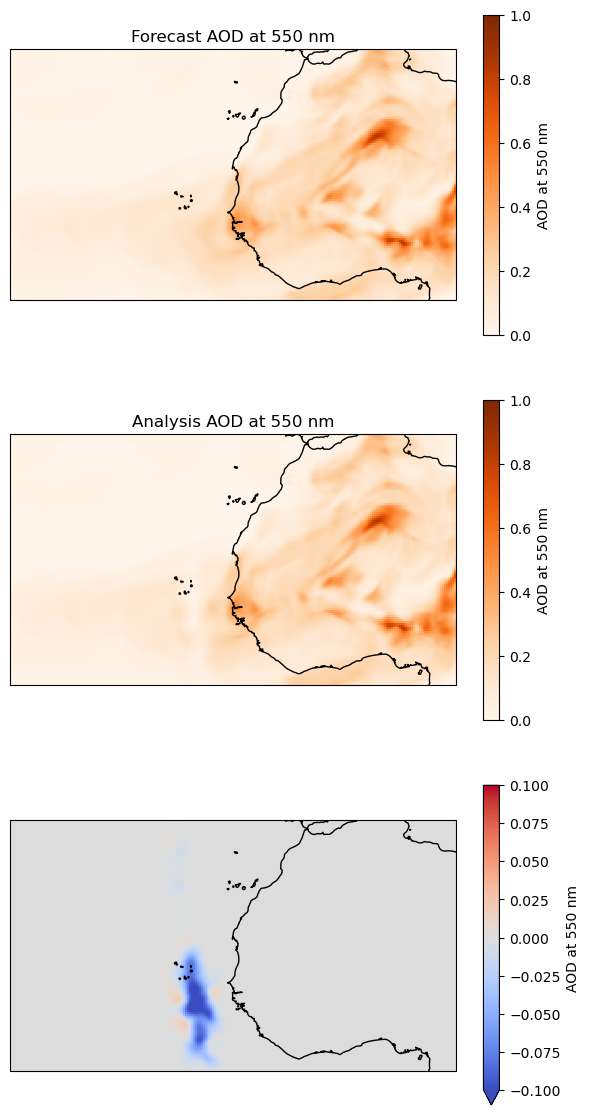

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12), subplot_kw={"projection": wrf_proj})

kwargs = {
    "x": "x",
    "y": "y",
    "transform": wrf_proj,
    "cmap": "Oranges",
    "vmin": 0,
    "vmax": 1,
    "cbar_kwargs": {
        "label": "AOD at 550 nm",
        "orientation": "vertical",
        "shrink": 0.8,
    },
}

fc.isel(t=-1).AOD_550.plot(
    ax=axes[0],
    **kwargs,
)
axes[0].set_title("Forecast AOD at 550 nm")

an.AOD_550.plot(
    ax=axes[1],
    **kwargs,
)
axes[1].set_title("Analysis AOD at 550 nm")

(an.AOD_550 - fc.isel(t=-1).AOD_550).plot(
    ax=axes[2],
    **kwargs
    | dict(
        cmap="coolwarm",
        vmin=-0.1,
        vmax=0.1,
    ),
)

for ax in axes:
    ax.coastlines()

fig.tight_layout()

In [11]:
# Plot profile along observation lines
# First, get unique (x, y) pairs from the observations
obs_coords = diag[["x", "y"]].drop_duplicates()
lon, lat = obs_coords["x"].values, obs_coords["y"].values

# Convert to WRF (x,y) pairds
points = wrf_proj.transform_points(ccrs.PlateCarree(), lon, lat)
x, y = points[:, 0], points[:, 1]

obs_coords = xr.Dataset(
    dict(x=("obs_idx", x), y=("obs_idx", y)),
    coords=dict(obs_idx=("obs_idx", obs_coords.index)),
)
obs_coords

<xarray.Dataset> Size: 3kB
Dimensions:  (obs_idx: 129)
Coordinates:
  * obs_idx  (obs_idx) int64 1kB 0 17 31 45 64 82 ... 1530 1531 1532 1539 1547
Data variables:
    x        (obs_idx) float64 1kB -1.078e+06 -1.082e+06 ... -1.515e+06
    y        (obs_idx) float64 1kB -1.829e+06 -1.799e+06 ... 1.777e+06 1.807e+06

In [12]:
# Interpolate wrf field to observation coordinates
fc_interp = fc.isel(t=-1).interp(obs_coords, method="linear")
an_interp = an.interp(obs_coords, method="linear")

fc_interp

<xarray.Dataset> Size: 4MB
Dimensions:              (obs_idx: 129, klevs_for_dust: 1, z: 44, soil_layers: 3)
Coordinates:
    latitude             (obs_idx) float64 1kB 3.475 3.733 3.991 ... 35.14 35.4
    longitude            (obs_idx) float64 1kB -20.38 -20.43 ... -26.97 -27.03
  * z                    (z) float32 176B 0.9969 0.9904 ... 0.01402 0.004424
    x                    (obs_idx) float64 1kB -1.078e+06 ... -1.515e+06
    y                    (obs_idx) float64 1kB -1.829e+06 ... 1.807e+06
  * obs_idx              (obs_idx) int64 1kB 0 17 31 45 ... 1531 1532 1539 1547
Dimensions without coordinates: klevs_for_dust, soil_layers
Data variables: (12/122)
    UST_T                (obs_idx) float64 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    quantization_info    |S1 1B b''
    EDUST1               (klevs_for_dust, obs_idx) float64 1kB 0.0 0.0 ... 0.0
    EDUST2               (klevs_for_dust, obs_idx) float64 1kB 0.0 0.0 ... 0.0
    EDUST3               (klevs_for_dust, obs_idx) float64 1kB 0.0 0.0 ... 0.0
    EDUST4               (klevs_for_dust, obs_idx) float64 1kB 0.0 0.0 ... 0.0
    ...                   ...
    AOD_DUST_550         (obs_idx) float64 1kB 0.03807 0.04697 ... 0.01798
    AOD_SEAS_550         (obs_idx) float64 1kB 6.977e-05 7.591e-05 ... 0.002021
    AOD_550              (obs_idx) float64 1kB 0.03813 0.04704 ... 0.02001
    AOD_DUST_1064        (obs_idx) float64 1kB 0.03423 0.04225 ... 0.0158
    AOD_SEAS_1064        (obs_idx) float64 1kB 5.479e-05 5.961e-05 ... 0.001595
    AOD_1064             (obs_idx) float64 1kB 0.03429 0.04231 ... 0.01738
Attributes: (12/142)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2025-04-05_00:00:00
    SIMULATION_START_DATE:           2025-04-05_00:00:00
    WEST-EAST_GRID_DIMENSION:        230
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    wrf_ensembly:                    Created by wrf_ensembly
    history:                         Tue Jul  8 11:42:30 2025: ncrcat -4 -O -...
    NCO:                             netCDF Operators version 5.2.7 (Homepage...

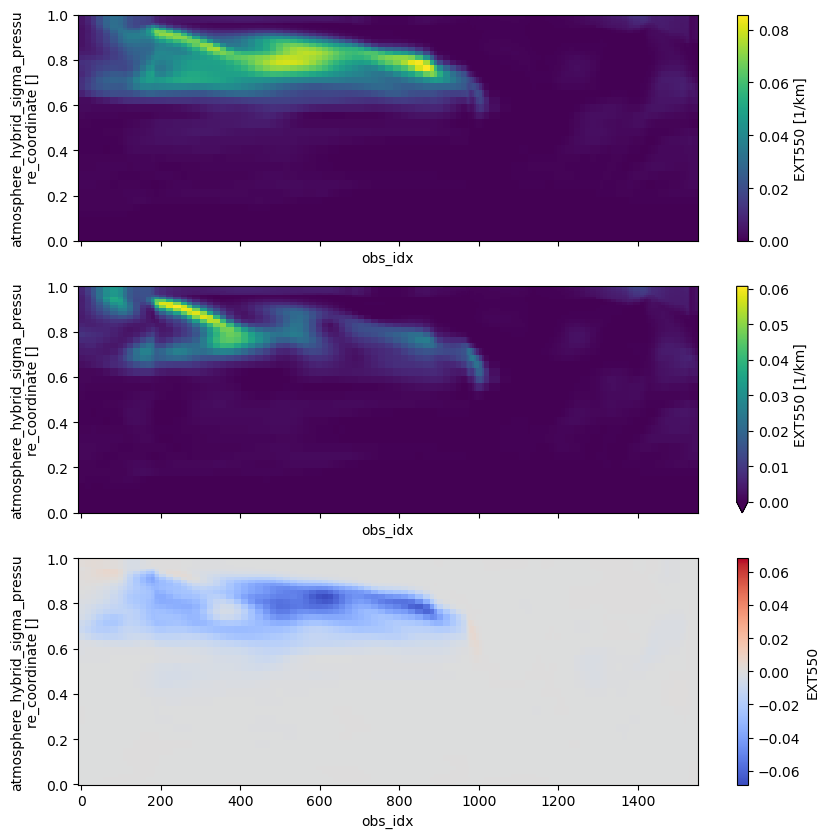

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)

fc_interp.EXT550.plot.pcolormesh(
    x="obs_idx",
    y="z",
    ax=axes[0],
    vmin=0,
)

an_interp.EXT550.plot.pcolormesh(x="obs_idx", y="z", ax=axes[1], vmin=0)

(an_interp.EXT550 - fc_interp.EXT550).plot.pcolormesh(
    x="obs_idx",
    y="z",
    cmap="coolwarm",
    axes=axes[2],
)